<a href="https://colab.research.google.com/github/ElpoderdelComputo/Procesamiento_imagenes/blob/main/Transformaciones_geometricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Transformaciones geométricas**

1.   Autor: Jose Rodriguez Rosales
2.   YouTube: [El Poder del Cómputo](https://www.youtube.com/@elpoderdelcomputo)

In [1]:
from ipywidgets import interactive, fixed, interact
import matplotlib.pyplot as plt
import numpy as np
import cv2
import ipywidgets as widgets
from IPython.display import display


print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


In [2]:
# Cargar imagen
image = cv2.imread('/content/Lenna.png')

# Convertir de BGR a RGB para matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

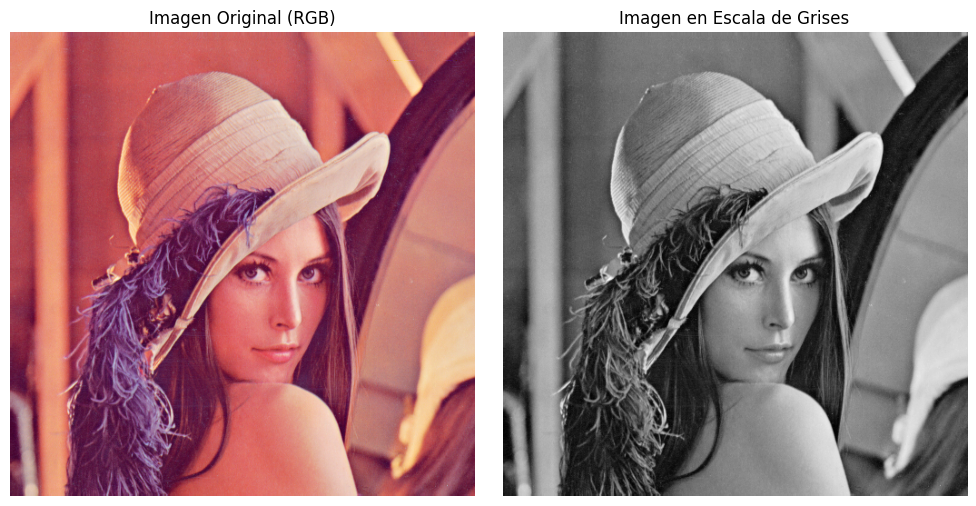

In [3]:
# Mostrar la imagen original
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(image_rgb)
axes[0].set_title('Imagen Original (RGB)')
axes[0].axis('off')

# Mostrar también en escala de grises para algunas transformaciones
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
axes[1].imshow(image_gray, cmap='gray')
axes[1].set_title('Imagen en Escala de Grises')
axes[1].axis('off')

plt.tight_layout()
plt.show()


In [4]:
# ## 🔄 2. Rotación de Imágenes
#
# La rotación gira una imagen alrededor de un punto central.
# En OpenCV, usamos `cv2.getRotationMatrix2D` para crear la matriz de transformación
# y `cv2.warpAffine` para aplicar la rotación.

def rotate_image(image, angle, scale=1.0):
    """
    Rota una imagen por un ángulo específico.

    Args:
        image: Imagen de entrada
        angle: Ángulo de rotación en grados (positivo = sentido antihorario)
        scale: Factor de escala (1.0 = tamaño original)

    Returns:
        Imagen rotada
    """
    # Obtener dimensiones de la imagen
    (h, w) = image.shape[:2]

    # Calcular el centro de la imagen
    center = (w // 2, h // 2)

    # Obtener la matriz de rotación
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)

    # Aplicar la rotación
    rotated = cv2.warpAffine(image, rotation_matrix, (w, h))

    return rotated


In [5]:
# %% [markdown]
# ### 🎮 Demostración interactiva de rotación

# %%
%matplotlib inline

def demo_rotacion_interactiva(angulo=30):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Panel 1: Imagen original
    axes[0].imshow(image_rgb)
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    # Panel 2: Imagen rotada
    rotated = rotate_image(image_rgb, angulo)
    axes[1].imshow(rotated)
    axes[1].set_title(f'Imagen Rotada ({angulo:.1f}°)')
    axes[1].axis('off')

    # Panel 3: Matriz de transformación
    rad = np.radians(angulo)
    cos_val = np.cos(rad)
    sin_val = np.sin(rad)

    axes[2].text(0.1, 0.5,
                 f'Matriz de Rotación (2x3):\n\n'
                 f'[[{cos_val:.3f}  {-sin_val:.3f}  tx]\n'
                 f' [{sin_val:.3f}   {cos_val:.3f}  ty]]\n\n'
                 f'Donde:\n'
                 f'• tx, ty: traslaciones para mantener el centro\n'
                 f'• cos({angulo:.1f}°) = {cos_val:.3f}\n'
                 f'• sin({angulo:.1f}°) = {sin_val:.3f}',
                 fontsize=11,
                 verticalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    axes[2].axis('off')
    axes[2].set_title('Matriz de Transformación')

    plt.tight_layout()
    plt.show()

# Crear slider interactivo
angulo_slider = widgets.FloatSlider(
    value=30,
    min=-180,
    max=180,
    step=0.5,
    description='Ángulo (grados):',
    continuous_update=True,
    readout_format='.1f',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

# Usar interact con la función
interact(demo_rotacion_interactiva, angulo=angulo_slider)

print("🎮 ¡Desliza para rotar la imagen! Prueba con: 45°, 90°, -45°, 180°")
print("💡 La matriz muestra los valores de coseno y seno del ángulo")

interactive(children=(FloatSlider(value=30.0, description='Ángulo (grados):', layout=Layout(width='90%'), max=…

🎮 ¡Desliza para rotar la imagen! Prueba con: 45°, 90°, -45°, 180°
💡 La matriz muestra los valores de coseno y seno del ángulo


In [6]:
# %% [markdown]
# ## ➔ 3. Traslación de Imágenes

# La traslación mueve una imagen en dirección horizontal (x) y vertical (y).
# Creamos una matriz de traslación y aplicamos `cv2.warpAffine`.

# %%
def translate_image(image, tx, ty):
    """
    Traslada una imagen en dirección horizontal y vertical.

    Args:
        image: Imagen de entrada
        tx: Traslación en dirección x (positivo = derecha)
        ty: Traslación en dirección y (positivo = abajo)

    Returns:
        Imagen trasladada
    """
    # Crear la matriz de traslación
    translation_matrix = np.float32([[1, 0, tx],
                                     [0, 1, ty]])

    # Obtener dimensiones
    (h, w) = image.shape[:2]

    # Aplicar la traslación
    translated = cv2.warpAffine(image, translation_matrix, (w, h))

    return translated

# %% [markdown]
# ### 🎮 Demostración interactiva de traslación

# %%
%matplotlib inline

def demo_traslacion_interactiva(tx=50, ty=30):
    """
    Demostración interactiva de traslación de imágenes.

    Args:
        tx: Desplazamiento horizontal (positivo = derecha)
        ty: Desplazamiento vertical (positivo = abajo)
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Panel 1: Imagen original
    axes[0].imshow(image_rgb)
    axes[0].set_title('Imagen Original')
    axes[0].axis('off')

    # Panel 2: Imagen trasladada
    translated = translate_image(image_rgb, tx, ty)
    axes[1].imshow(translated)
    axes[1].set_title(f'Imagen Trasladada\n(tx={tx}, ty={ty})')
    axes[1].axis('off')

    # Panel 3: Matriz de traslación
    axes[2].text(0.1, 0.5,
                 f'Matriz de Traslación (2x3):\n\n'
                 f'[[1   0   {tx:3d}]\n'
                 f' [0   1   {ty:3d}]]\n\n'
                 f'Fórmula de transformación:\n'
                 f'x\' = x + {tx}\n'
                 f'y\' = y + {ty}\n\n'
                 f'Donde:\n'
                 f'• tx = desplazamiento en X\n'
                 f'• ty = desplazamiento en Y\n'
                 f'• Valores positivos mueven:\n'
                 f'  - Derecha (tx > 0)\n'
                 f'  - Abajo (ty > 0)',
                 fontsize=11,
                 verticalalignment='center',
                 bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
    axes[2].axis('off')
    axes[2].set_title('Matriz de Traslación')

    plt.tight_layout()
    plt.show()

# Crear sliders interactivos
tx_slider = widgets.IntSlider(
    value=50,
    min=-200,
    max=200,
    step=5,
    description='Desplazamiento X:',
    continuous_update=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

ty_slider = widgets.IntSlider(
    value=30,
    min=-200,
    max=200,
    step=5,
    description='Desplazamiento Y:',
    continuous_update=True,
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='90%')
)

# Usar interact con ambos sliders
@interact(tx=tx_slider, ty=ty_slider)
def actualizar_traslacion(tx, ty):
    demo_traslacion_interactiva(tx, ty)

print("🎮 ¡Usa los sliders para trasladar la imagen!")
print("💡 Prueba estos valores interesantes:")
print("   • tx=100, ty=0  → Solo desplazamiento horizontal")
print("   • tx=0, ty=100  → Solo desplazamiento vertical")
print("   • tx=-100, ty=-50 → Desplazamiento hacia arriba-izquierda")
print("   • tx=100, ty=100 → Desplazamiento diagonal")

interactive(children=(IntSlider(value=50, description='Desplazamiento X:', layout=Layout(width='90%'), max=200…

🎮 ¡Usa los sliders para trasladar la imagen!
💡 Prueba estos valores interesantes:
   • tx=100, ty=0  → Solo desplazamiento horizontal
   • tx=0, ty=100  → Solo desplazamiento vertical
   • tx=-100, ty=-50 → Desplazamiento hacia arriba-izquierda
   • tx=100, ty=100 → Desplazamiento diagonal


In [7]:
# %% [markdown]
# ### 🎮 Transformación de Perspectiva
# La transformación de perspectiva permite "alinear" o "rectificar" una
# imagen vista en ángulo, como si la viéramos de frente.
# Esto es útil para procesar documentos, tableros, planos, etc.

# %%
%matplotlib inline

def apply_perspective_transform(image, points):
    """
    Aplica una transformación de perspectiva a una imagen.

    Args:
        image: Imagen de entrada
        points: Lista de 4 puntos [x, y] para la transformación

    Returns:
        Imagen con transformación de perspectiva aplicada
    """
    # Obtener dimensiones de la imagen
    h, w = image.shape[:2]

    # Puntos originales (esquinas de la imagen)
    src_points = np.float32([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1]])

    # Puntos de destino (transformados)
    dst_points = np.float32(points)

    # Calcular la matriz de transformación de perspectiva
    perspective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)

    # Aplicar la transformación de perspectiva
    warped = cv2.warpPerspective(image, perspective_matrix, (w, h))

    return warped, perspective_matrix

# Obtener dimensiones
h, w = image_rgb.shape[:2]

# Puntos iniciales para la transformación de perspectiva (definidos globalmente)
initial_points = [
        [0, 0],          # Esquina superior izquierda
        [w-1, 0],        # Esquina superior derecha
        [w-1, h-1],      # Esquina inferior derecha
        [0, h-1]         # Esquina inferior izquierda
    ]

def demo_perspectiva_organizada(p1_x=0, p1_y=0, p2_x=None, p2_y=0,
                                p3_x=None, p3_y=None, p4_x=0, p4_y=None):
    """
    Versión organizada de la transformación de perspectiva.
    """
    # Valores por defecto dinámicos
    if p2_x is None:
        p2_x = w-1
    if p3_x is None:
        p3_x = w-1
    if p3_y is None:
        p3_y = h-1
    if p4_y is None:
        p4_y = h-1

    puntos = [[p1_x, p1_y], [p2_x, p2_y], [p3_x, p3_y], [p4_x, p4_y]]

    # Crear figura
    fig = plt.figure(figsize=(16, 6))

    # Panel 1: Original con conexiones
    ax1 = plt.subplot(1, 3, 1)
    ax1.imshow(image_rgb)

    # Dibujar el cuadrilátero original
    original_pts = np.array([[0, 0], [w-1, 0], [w-1, h-1], [0, h-1], [0, 0]], np.int32)
    original_pts = original_pts.reshape((-1, 1, 2))

    # Crear una copia para dibujar
    img_con_lineas = image_rgb.copy()
    cv2.polylines(img_con_lineas, [original_pts], True, (0, 255, 0), 2)

    # Dibujar puntos
    colores = [(255, 0, 0), (0, 255, 0), (0, 0, 255), (255, 255, 0)]
    for i, (x, y) in enumerate(initial_points):
        cv2.circle(img_con_lineas, (x, y), 8, colores[i], -1)

    ax1.imshow(img_con_lineas)
    ax1.set_title('Imagen Original\n(Forma original)')
    ax1.axis('off')

    # Panel 2: Transformación aplicada
    ax2 = plt.subplot(1, 3, 2)
    warped, matrix = apply_perspective_transform(image_rgb, puntos)
    ax2.imshow(warped)

    # Dibujar el nuevo cuadrilátero
    destino_pts = np.array(puntos + [puntos[0]], np.int32)
    destino_pts = destino_pts.reshape((-1, 1, 2))

    warped_con_lineas = warped.copy()
    cv2.polylines(warped_con_lineas, [destino_pts], True, (0, 255, 0), 2)

    # Dibujar puntos
    for i, (x, y) in enumerate(puntos):
        if 0 <= x < w and 0 <= y < h:
            cv2.circle(warped_con_lineas, (int(x), int(y)), 8, colores[i], -1)

    ax2.imshow(warped_con_lineas)
    ax2.set_title('Transformación de Perspectiva\n(Nueva forma)')
    ax2.axis('off')

    # Panel 3: Información
    ax3 = plt.subplot(1, 3, 3)
    ax3.axis('off')

    info = "TRANSFORMACIÓN DE PERSPECTIVA\n"
    info += "="*30 + "\n\n"

    info += "PUNTOS DE CONTROL:\n"
    info += f"• P1 (Sup. Izq.): ({p1_x}, {p1_y})\n"
    info += f"• P2 (Sup. Der.): ({p2_x}, {p2_y})\n"
    info += f"• P3 (Inf. Der.): ({p3_x}, {p3_y})\n"
    info += f"• P4 (Inf. Izq.): ({p4_x}, {p4_y})\n\n"

    info += "MATRIZ 3*3:\n"
    for i in range(3):
        info += "[ "
        for j in range(3):
            info += f"{matrix[i, j]:7.3f} "
        info += "]\n"

    info += "\nEFECTOS COMUNES:\n"
    info += "1. P1↓ + P2↓ = Vista desde arriba\n"
    info += "2. P3↑ + P4↑ = Vista desde abajo\n"
    info += "3. P2→ + P3→ = Vista lateral derecha\n"
    info += "4. P1← + P4← = Vista lateral izquierda"

    ax3.text(0.05, 0.5, info, fontsize=11, verticalalignment='center',
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    plt.tight_layout()
    plt.show()

# Crear controles con rangos ajustados
print("🔧 CONTROLES DE PERSPECTIVA")
print("Cada slider controla una coordenada de los 4 puntos de esquina")

# Usar interact con todos los parámetros
interact(demo_perspectiva_organizada,
         p1_x=widgets.IntSlider(value=0, min=-w//2, max=w*3//2, step=5,
                               description='P1 X:', style={'description_width': 'initial'}),
         p1_y=widgets.IntSlider(value=0, min=-h//2, max=h*3//2, step=5,
                               description='P1 Y:', style={'description_width': 'initial'}),
         p2_x=widgets.IntSlider(value=w-1, min=-w//2, max=w*3//2, step=5,
                               description='P2 X:', style={'description_width': 'initial'}),
         p2_y=widgets.IntSlider(value=0, min=-h//2, max=h*3//2, step=5,
                               description='P2 Y:', style={'description_width': 'initial'}),
         p3_x=widgets.IntSlider(value=w-1, min=-w//2, max=w*3//2, step=5,
                               description='P3 X:', style={'description_width': 'initial'}),
         p3_y=widgets.IntSlider(value=h-1, min=-h//2, max=h*3//2, step=5,
                               description='P3 Y:', style={'description_width': 'initial'}),
         p4_x=widgets.IntSlider(value=0, min=-w//2, max=w*3//2, step=5,
                               description='P4 X:', style={'description_width': 'initial'}),
         p4_y=widgets.IntSlider(value=h-1, min=-h//2, max=h*3//2, step=5,
                               description='P4 Y:', style={'description_width': 'initial'}))

🔧 CONTROLES DE PERSPECTIVA
Cada slider controla una coordenada de los 4 puntos de esquina


interactive(children=(IntSlider(value=0, description='P1 X:', max=768, min=-256, step=5, style=SliderStyle(des…

<function __main__.demo_perspectiva_organizada(p1_x=0, p1_y=0, p2_x=None, p2_y=0, p3_x=None, p3_y=None, p4_x=0, p4_y=None)>

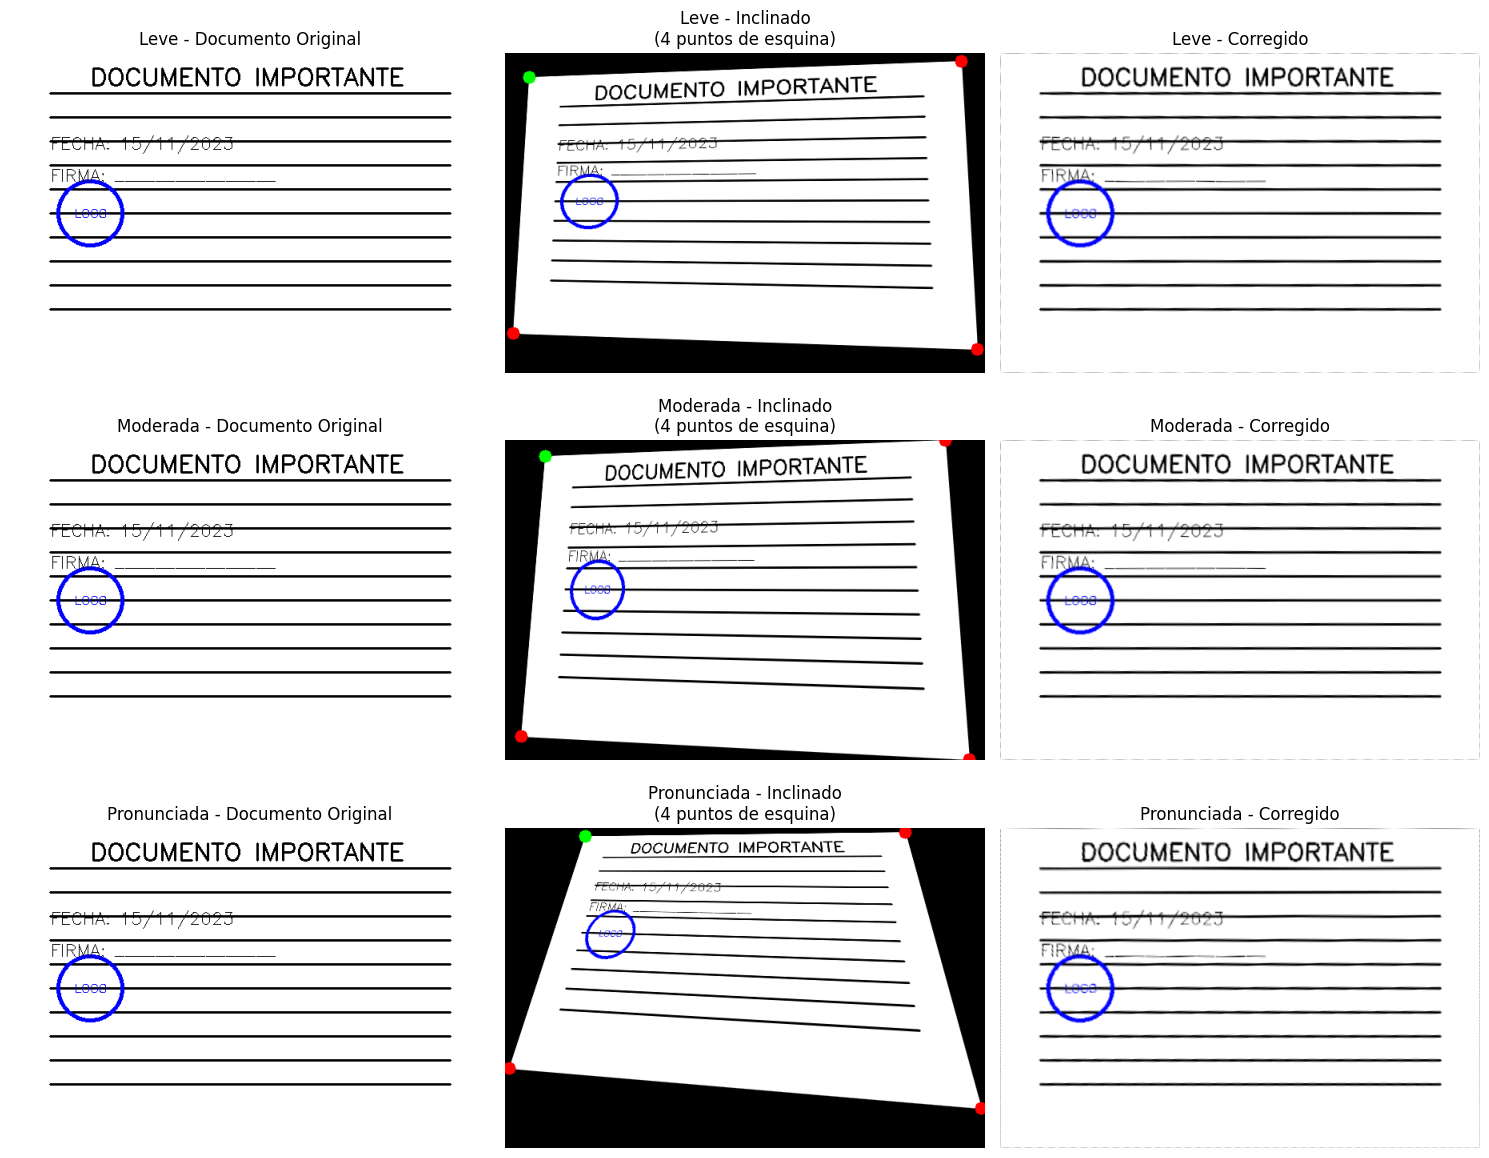

📄 ¡Hemos corregido la perspectiva de documentos inclinados!
Esta técnica es muy útil en escáneres de documentos y aplicaciones OCR.
🎮 DEMOSTRACIÓN INTERACTIVA: Corrección de Documentos


interactive(children=(FloatSlider(value=1.0, description='Inclinación:', max=2.0, min=0.1, style=SliderStyle(d…


💡 EXPLICACIÓN DEL PROCESO:
1. El documento se fotografía desde un ángulo → se distorsiona
2. Detectamos las 4 esquinas del documento (puntos verdes/rojos)
3. Calculamos la transformación para 'enderezarlo'
4. Aplicamos la transformación usando la matriz 3x3

📱 APLICACIONES REALES:
• Escáneres de documentos (CamScanner, Adobe Scan)
• Aplicaciones bancarias (fotos de cheques)
• OCR (reconocimiento óptico de caracteres)
• Realidad aumentada (alineación de objetos)
🛠️ HERRAMIENTA INTERACTIVA: Corrección Manual de Documentos
Simula cómo funciona una app de escaneo de documentos:
1. Tú 'fotografías' un documento desde un ángulo
2. Seleccionas manualmente las 4 esquinas
3. La app corrige automáticamente la perspectiva


interactive(children=(IntSlider(value=50, description='Esq1 X:', max=700, step=10, style=SliderStyle(descripti…


📱 APLICACIONES EN LA VIDA REAL:
• Google Drive: Escanea documentos con la cámara
• Microsoft Office Lens: Corrección automática
• Apps bancarias: Depósito de cheques por foto
• Adobe Scan: Digitalización profesional


In [9]:
# %% [markdown]
# ## 🎯 5. Aplicación práctica: Corregir perspectiva de un documento

# Una aplicación común de la transformación de perspectiva es corregir la
# vista de un documento escaneado o fotografiado desde un ángulo.

# %%
# Crear una imagen simulada de un documento inclinado
def create_tilted_document():
    # Crear una imagen blanca con texto simulado
    doc_image = 255 * np.ones((400, 600, 3), dtype=np.uint8)

    # Agregar "texto" (líneas horizontales)
    for i in range(50, 350, 30):
        cv2.line(doc_image, (50, i), (550, i), (0, 0, 0), 2)

    # Agregar un título
    cv2.putText(doc_image, "DOCUMENTO IMPORTANTE", (100, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    # Agregar un logo o sello
    cv2.circle(doc_image, (100, 200), 40, (0, 0, 255), 3)
    cv2.putText(doc_image, "LOGO", (80, 205),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)

    # Agregar más detalles
    cv2.putText(doc_image, "FECHA: 15/11/2023", (50, 120),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)
    cv2.putText(doc_image, "FIRMA: ________________", (50, 160),
                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)

    return doc_image

# %% [markdown]
# ### 📄 Demostración estática de corrección de documento

# %%
# Configurar matplotlib
%matplotlib inline

# Crear el documento
document = create_tilted_document()

# Aplicar una transformación de perspectiva para inclinarlo
h, w = document.shape[:2]

# Definir diferentes niveles de inclinación
inclinaciones = [
    ("Leve", [[30, 30], [w-30, 10], [w-10, h-30], [10, h-50]]),
    ("Moderada", [[50, 20], [w-50, 0], [w-20, h-1], [20, h-30]]),
    ("Pronunciada", [[100, 10], [w-100, 5], [w-5, h-50], [5, h-100]])
]

# Crear figura para mostrar todas las inclinaciones
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for fila, (nombre, tilted_points) in enumerate(inclinaciones):
    tilted_points = np.float32(tilted_points)

    # Aplicar la transformación para crear un documento inclinado
    tilted_document, _ = apply_perspective_transform(document, tilted_points)

    # Definir los puntos de destino (un rectángulo perfecto)
    corrected_points = np.float32([
        [0, 0],      # Superior izquierda
        [w-1, 0],    # Superior derecha
        [w-1, h-1],  # Inferior derecha
        [0, h-1]     # Inferior izquierda
    ])

    # Calcular la matriz para corregir la perspectiva
    correction_matrix = cv2.getPerspectiveTransform(tilted_points, corrected_points)

    # Aplicar la corrección
    corrected_document = cv2.warpPerspective(tilted_document, correction_matrix, (w, h))

    # Mostrar resultados
    # Documento original
    axes[fila, 0].imshow(document)
    axes[fila, 0].set_title(f'{nombre} - Documento Original')
    axes[fila, 0].axis('off')

    # Documento inclinado (con puntos marcados)
    tilted_with_points = tilted_document.copy()
    for i, (x, y) in enumerate(tilted_points):
        cv2.circle(tilted_with_points, (int(x), int(y)), 8, (0, 255, 0) if i==0 else (255, 0, 0), -1)

    axes[fila, 1].imshow(tilted_with_points)
    axes[fila, 1].set_title(f'{nombre} - Inclinado\n(4 puntos de esquina)')
    axes[fila, 1].axis('off')

    # Documento corregido
    axes[fila, 2].imshow(corrected_document)
    axes[fila, 2].set_title(f'{nombre} - Corregido')
    axes[fila, 2].axis('off')

plt.tight_layout()
plt.show()

print("📄 ¡Hemos corregido la perspectiva de documentos inclinados!")
print("Esta técnica es muy útil en escáneres de documentos y aplicaciones OCR.")

# %% [markdown]
# ### 🎮 Demostración interactiva de corrección de documento

# %%
# Versión interactiva para experimentar
%matplotlib inline

def demo_correccion_documento(inclinacion=1.0, corregir=True):
    """
    Demostración interactiva de corrección de perspectiva de documentos.

    Args:
        inclinacion: Nivel de inclinación (0.0 a 2.0)
        corregir: Si aplicar o no la corrección
    """
    # Crear documento
    doc = create_tilted_document()
    h, w = doc.shape[:2]

    # Calcular puntos inclinados según el nivel de inclinación
    # Inclinación controlable
    offset_x = int(50 * inclinacion)
    offset_y = int(30 * inclinacion)

    tilted_points = np.float32([
        [offset_x, offset_y],              # Superior izquierda
        [w - offset_x, offset_y // 2],     # Superior derecha
        [w - offset_x // 2, h - offset_y], # Inferior derecha
        [offset_x // 2, h - offset_y // 2] # Inferior izquierda
    ])

    # Aplicar inclinación
    tilted_doc, _ = apply_perspective_transform(doc, tilted_points)

    # Puntos de corrección (rectángulo perfecto)
    corrected_points = np.float32([
        [0, 0],
        [w-1, 0],
        [w-1, h-1],
        [0, h-1]
    ])

    # Crear figura
    if corregir:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        # Calcular matriz de corrección
        correction_matrix = cv2.getPerspectiveTransform(tilted_points, corrected_points)

        # Aplicar corrección
        corrected_doc = cv2.warpPerspective(tilted_doc, correction_matrix, (w, h))

        # Panel 1: Documento original
        axes[0].imshow(doc)
        axes[0].set_title('Documento Original')
        axes[0].axis('off')

        # Panel 2: Documento inclinado (con puntos)
        tilted_with_markers = tilted_doc.copy()
        colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0)]
        for i, (x, y) in enumerate(tilted_points):
            cv2.circle(tilted_with_markers, (int(x), int(y)), 10, colors[i], -1)
            cv2.putText(tilted_with_markers, f'P{i+1}', (int(x)-15, int(y)-15),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.6, colors[i], 2)

        axes[1].imshow(tilted_with_markers)
        axes[1].set_title(f'Documento Inclinado\n(Inclinación: {inclinacion:.1f})')
        axes[1].axis('off')

        # Panel 3: Documento corregido
        axes[2].imshow(corrected_doc)
        axes[2].set_title('Documento Corregido')
        axes[2].axis('off')

        plt.suptitle('📄 CORRECCIÓN DE PERSPECTIVA DE DOCUMENTOS', fontsize=16, y=1.05)

    else:
        # Solo mostrar inclinado vs original
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        axes[0].imshow(doc)
        axes[0].set_title('Documento Original')
        axes[0].axis('off')

        axes[1].imshow(tilted_doc)
        axes[1].set_title(f'Documento Inclinado\n(Nivel: {inclinacion:.1f})')
        axes[1].axis('off')

        plt.suptitle('📄 SIMULACIÓN DE DOCUMENTO INCLINADO', fontsize=16, y=1.05)

    plt.tight_layout()
    plt.show()

    # Mostrar información adicional
    print(f"\n📊 INFORMACIÓN:")
    print(f"• Nivel de inclinación: {inclinacion:.1f}")
    print(f"• Corrección aplicada: {'Sí' if corregir else 'No'}")

    if corregir:
        print(f"• Técnica: cv2.getPerspectiveTransform() + cv2.warpPerspective()")
        print(f"• Puntos detectados: 4 esquinas del documento")

# Crear controles interactivos
print("🎮 DEMOSTRACIÓN INTERACTIVA: Corrección de Documentos")
print("="*60)

# Usar interact
interact(demo_correccion_documento,
         inclinacion=widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1,
                                        description='Inclinación:',
                                        style={'description_width': 'initial'}),
         corregir=widgets.ToggleButton(value=True,
                                      description='Aplicar corrección',
                                      style={'description_width': 'initial'}))

print("\n💡 EXPLICACIÓN DEL PROCESO:")
print("1. El documento se fotografía desde un ángulo → se distorsiona")
print("2. Detectamos las 4 esquinas del documento (puntos verdes/rojos)")
print("3. Calculamos la transformación para 'enderezarlo'")
print("4. Aplicamos la transformación usando la matriz 3x3")
print("\n📱 APLICACIONES REALES:")
print("• Escáneres de documentos (CamScanner, Adobe Scan)")
print("• Aplicaciones bancarias (fotos de cheques)")
print("• OCR (reconocimiento óptico de caracteres)")
print("• Realidad aumentada (alineación de objetos)")

# %% [markdown]
# ### 🔧 Herramienta interactiva: Selecciona tus propios puntos

# %%
# Herramienta para seleccionar puntos manualmente
%matplotlib inline

# Crear un documento más complejo
def create_complex_document():
    doc = 255 * np.ones((500, 700, 3), dtype=np.uint8)

    # Título
    cv2.putText(doc, "CONTRATO IMPORTANTE", (150, 50),
               cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 0, 0), 2)

    # Líneas para texto
    for i in range(100, 400, 25):
        cv2.line(doc, (50, i), (650, i), (200, 200, 200), 1)

    # Texto simulado
    textos = [
        "1. Las partes acuerdan los siguientes términos:",
        "2. El contrato tendrá vigencia de 12 meses.",
        "3. El pago se realizará mensualmente.",
        "4. Cualquier modificación requiere acuerdo mutuo.",
        "5. Este documento es legalmente vinculante."
    ]

    for i, texto in enumerate(textos):
        cv2.putText(doc, texto, (60, 120 + i*40),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 1)

    # Sello
    cv2.rectangle(doc, (500, 350), (650, 450), (0, 0, 255), 3)
    cv2.putText(doc, "SELLO", (530, 410),
               cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

    # Firma
    cv2.line(doc, (100, 420), (250, 420), (0, 0, 0), 2)
    cv2.putText(doc, "FIRMA AUTORIZADA", (110, 460),
               cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 1)

    return doc

def herramienta_correccion_manual(p1_x=50, p1_y=30, p2_x=650, p2_y=20,
                                  p3_x=680, p3_y=480, p4_x=30, p4_y=470):
    """
    Herramienta interactiva para corregir perspectiva manualmente.
    """
    # Crear documento
    doc = create_complex_document()
    h, w = doc.shape[:2]

    # Puntos seleccionados por el usuario
    user_points = np.float32([[p1_x, p1_y], [p2_x, p2_y],
                              [p3_x, p3_y], [p4_x, p4_y]])

    # Puntos objetivo (documento recto)
    target_points = np.float32([[0, 0], [w-1, 0],
                                [w-1, h-1], [0, h-1]])

    # Aplicar transformación para "inclinar" el documento
    # (simulando una foto tomada desde ángulo)
    tilted_doc, _ = apply_perspective_transform(doc, user_points)

    # Calcular matriz de corrección
    correction_matrix = cv2.getPerspectiveTransform(user_points, target_points)

    # Aplicar corrección
    corrected_doc = cv2.warpPerspective(tilted_doc, correction_matrix, (w, h))

    # Crear visualización
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # 1. Documento original
    axes[0, 0].imshow(doc)
    axes[0, 0].set_title('Documento Original (Perfecto)')
    axes[0, 0].axis('off')

    # 2. Documento "fotografiado" (con puntos de usuario)
    tilted_with_points = tilted_doc.copy()
    colors = [(0, 255, 0), (255, 0, 0), (0, 0, 255), (255, 255, 0)]

    for i, (x, y) in enumerate(user_points):
        cv2.circle(tilted_with_points, (int(x), int(y)), 12, colors[i], -1)
        cv2.putText(tilted_with_points, f'Esq. {i+1}', (int(x)-30, int(y)-20),
                   cv2.FONT_HERSHEY_SIMPLEX, 0.7, colors[i], 2)

    axes[0, 1].imshow(tilted_with_points)
    axes[0, 1].set_title('"Foto" del Documento\n(Selecciona las 4 esquinas)')
    axes[0, 1].axis('off')

    # 3. Documento corregido
    axes[1, 0].imshow(corrected_doc)
    axes[1, 0].set_title('Documento Corregido')
    axes[1, 0].axis('off')

    # 4. Información y matriz
    axes[1, 1].axis('off')

    info_text = "INSTRUCCIONES:\n"
    info_text += "1. Ajusta los sliders para seleccionar\n"
    info_text += "   las 4 esquinas del documento\n"
    info_text += "2. Observa cómo se corrige la perspectiva\n\n"

    info_text += "TUS PUNTOS SELECCIONADOS:\n"
    nombres = ["Sup. Izq.", "Sup. Der.", "Inf. Der.", "Inf. Izq."]
    for i, (x, y) in enumerate(user_points):
        info_text += f"{nombres[i]}: ({x}, {y})\n"

    info_text += f"\nMATRIZ DE CORRECCIÓN:\n"
    for i in range(3):
        info_text += "["
        for j in range(3):
            info_text += f"{correction_matrix[i, j]:7.3f} "
        info_text += "]\n"

    axes[1, 1].text(0.05, 0.5, info_text, fontsize=11,
                   verticalalignment='center',
                   bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

    plt.suptitle('🛠️ HERRAMIENTA DE CORRECCIÓN DE DOCUMENTOS', fontsize=16, y=0.98)
    plt.tight_layout()
    plt.show()

    print(f"✅ Documento corregido exitosamente!")
    print(f"   Se usaron {len(user_points)} puntos para la corrección.")

print("🛠️ HERRAMIENTA INTERACTIVA: Corrección Manual de Documentos")
print("="*60)
print("Simula cómo funciona una app de escaneo de documentos:")
print("1. Tú 'fotografías' un documento desde un ángulo")
print("2. Seleccionas manualmente las 4 esquinas")
print("3. La app corrige automáticamente la perspectiva")

# Crear controles para los 4 puntos
interact(herramienta_correccion_manual,
         p1_x=widgets.IntSlider(value=50, min=0, max=700, step=10,
                               description='Esq1 X:', style={'description_width': 'initial'}),
         p1_y=widgets.IntSlider(value=30, min=0, max=500, step=10,
                               description='Esq1 Y:', style={'description_width': 'initial'}),
         p2_x=widgets.IntSlider(value=650, min=0, max=700, step=10,
                               description='Esq2 X:', style={'description_width': 'initial'}),
         p2_y=widgets.IntSlider(value=20, min=0, max=500, step=10,
                               description='Esq2 Y:', style={'description_width': 'initial'}),
         p3_x=widgets.IntSlider(value=680, min=0, max=700, step=10,
                               description='Esq3 X:', style={'description_width': 'initial'}),
         p3_y=widgets.IntSlider(value=480, min=0, max=500, step=10,
                               description='Esq3 Y:', style={'description_width': 'initial'}),
         p4_x=widgets.IntSlider(value=30, min=0, max=700, step=10,
                               description='Esq4 X:', style={'description_width': 'initial'}),
         p4_y=widgets.IntSlider(value=470, min=0, max=500, step=10,
                               description='Esq4 Y:', style={'description_width': 'initial'}))

print("\n📱 APLICACIONES EN LA VIDA REAL:")
print("• Google Drive: Escanea documentos con la cámara")
print("• Microsoft Office Lens: Corrección automática")
print("• Apps bancarias: Depósito de cheques por foto")
print("• Adobe Scan: Digitalización profesional")

/tmp/ipython-input-2430776335.py:51: UserWarning: Glyph 128196 (\N{PAGE FACING UP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


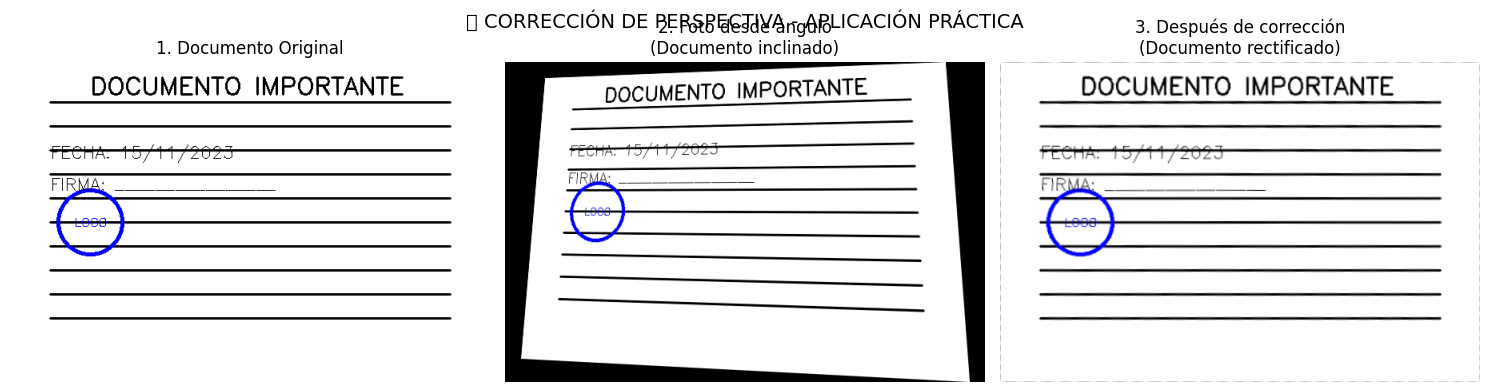

🔍 PROCESO DE CORRECCIÓN:
PASO 1: Foto del documento desde ángulo
   • Resultado: Documento inclinado/distorsionado

PASO 2: Detectar las 4 esquinas
   • Se identifican los puntos P1, P2, P3, P4
   • Estos definen el cuadrilátero del documento

PASO 3: Calcular transformación
   • cv2.getPerspectiveTransform(puntos_actuales, puntos_ideales)
   • Crea una matriz 3x3 de transformación

PASO 4: Aplicar corrección
   • cv2.warpPerspective(imagen, matriz, tamaño)
   • Resultado: Documento perfectamente recto

💡 Esta es la tecnología detrás de:
   • Escáneres de documentos en smartphones
   • Apps como CamScanner, Adobe Scan
   • Depósito de cheques por foto


In [10]:
# %% [markdown]
# ### 📄 Corrección simple de documento (versión mínima)

# %%
# Versión mínima y funcional
%matplotlib inline

# Crear y mostrar el ejemplo básico
document = create_tilted_document()
h, w = document.shape[:2]

# Puntos inclinados
tilted_points = np.float32([
    [50, 20],
    [w-50, 0],
    [w-20, h-1],
    [20, h-30]
])

# Aplicar inclinación
tilted_doc, _ = apply_perspective_transform(document, tilted_points)

# Puntos de corrección
corrected_points = np.float32([
    [0, 0],
    [w-1, 0],
    [w-1, h-1],
    [0, h-1]
])

# Calcular y aplicar corrección
correction_matrix = cv2.getPerspectiveTransform(tilted_points, corrected_points)
corrected_doc = cv2.warpPerspective(tilted_doc, correction_matrix, (w, h))

# Mostrar resultados
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(document)
axes[0].set_title('1. Documento Original')
axes[0].axis('off')

axes[1].imshow(tilted_doc)
axes[1].set_title('2. Foto desde ángulo\n(Documento inclinado)')
axes[1].axis('off')

axes[2].imshow(corrected_doc)
axes[2].set_title('3. Después de corrección\n(Documento rectificado)')
axes[2].axis('off')

plt.suptitle('📄 CORRECCIÓN DE PERSPECTIVA - APLICACIÓN PRÁCTICA', fontsize=14)
plt.tight_layout()
plt.show()

# Explicación paso a paso
print("🔍 PROCESO DE CORRECCIÓN:")
print("="*50)
print("PASO 1: Foto del documento desde ángulo")
print("   • Resultado: Documento inclinado/distorsionado")
print()
print("PASO 2: Detectar las 4 esquinas")
print("   • Se identifican los puntos P1, P2, P3, P4")
print("   • Estos definen el cuadrilátero del documento")
print()
print("PASO 3: Calcular transformación")
print("   • cv2.getPerspectiveTransform(puntos_actuales, puntos_ideales)")
print("   • Crea una matriz 3x3 de transformación")
print()
print("PASO 4: Aplicar corrección")
print("   • cv2.warpPerspective(imagen, matriz, tamaño)")
print("   • Resultado: Documento perfectamente recto")
print()
print("💡 Esta es la tecnología detrás de:")
print("   • Escáneres de documentos en smartphones")
print("   • Apps como CamScanner, Adobe Scan")
print("   • Depósito de cheques por foto")

In [11]:
# %% [markdown]
# ## 🎮 6. Juego interactivo: Transformaciones Aleatorias
#
# Vamos a crear un juego donde tendrás que adivinar qué transformación se aplicó a una imagen.

# %%
# Importar módulos necesarios
import random
import matplotlib.pyplot as plt
import numpy as np
import cv2
import ipywidgets as widgets
from IPython.display import display, clear_output
import time

# Configurar matplotlib para Colab
%matplotlib inline

# %% [markdown]
# ### 🎮 Versión interactiva del juego

# %%
class JuegoTransformaciones:
    def __init__(self, imagen):
        self.imagen = imagen
        self.score = 0
        self.ronda = 0
        self.total_rondas = 3
        self.transformaciones = []
        self.respuestas = []

    def generar_transformacion(self):
        """Genera una transformación aleatoria"""
        h, w = self.imagen.shape[:2]
        tipo = random.randint(1, 4)

        if tipo == 1:  # Rotación
            angulo = random.choice([45, 90, 135, 180, 225, 270, 315])
            transformada = rotate_image(self.imagen, angulo)
            info = f"Rotación de {angulo}°"
            pista = f"💡 La imagen ha sido girada"

        elif tipo == 2:  # Traslación
            tx = random.choice([-80, -50, 50, 80, 100])
            ty = random.choice([-60, -30, 30, 60, 100])
            transformada = translate_image(self.imagen, tx, ty)
            info = f"Traslación: tx={tx}, ty={ty}"
            pista = f"💡 La imagen se ha desplazado"

        elif tipo == 3:  # Perspectiva
            # Crear puntos aleatorios para perspectiva
            puntos = []
            desplazamiento = random.randint(30, 100)
            direccion = random.choice(['superior', 'inferior', 'izquierda', 'derecha'])

            if direccion == 'superior':
                puntos = [[0+desplazamiento, desplazamiento],
                         [w-1-desplazamiento, 0],
                         [w-1, h-1],
                         [0, h-1]]
            elif direccion == 'inferior':
                puntos = [[0, 0],
                         [w-1, 0],
                         [w-1-desplazamiento, h-1-desplazamiento],
                         [desplazamiento, h-1]]
            elif direccion == 'izquierda':
                puntos = [[desplazamiento, 0],
                         [w-1, desplazamiento],
                         [w-1-desplazamiento, h-1],
                         [0, h-1-desplazamiento]]
            else:  # derecha
                puntos = [[0, desplazamiento],
                         [w-1-desplazamiento, 0],
                         [w-1, h-1-desplazamiento],
                         [desplazamiento, h-1]]

            transformada, _ = apply_perspective_transform(self.imagen, puntos)
            info = f"Perspectiva desde {direccion}"
            pista = f"💡 Se cambió el punto de vista"

        else:  # Combinación
            # Rotación + Traslación
            angulo = random.choice([30, 60, 120, 150])
            tx = random.choice([40, 60, 80])
            ty = random.choice([40, 60, 80])

            rotada = rotate_image(self.imagen, angulo)
            transformada = translate_image(rotada, tx, ty)
            info = f"Combinación: Rotación {angulo}° + Traslación ({tx},{ty})"
            pista = f"💡 Se aplicaron dos transformaciones"

        return tipo, transformada, info, pista

    def mostrar_ronda(self, tipo, transformada, pista):
        """Muestra una ronda del juego"""
        clear_output(wait=True)

        print(f"🎮 RONDA {self.ronda + 1} de {self.total_rondas}")
        print("="*50)
        print("OBSERVA LA IMAGEN TRANSFORMADA Y ADIVINA:")
        print("\nOpciones:")
        print("1. Rotación")
        print("2. Traslación")
        print("3. Transformación de perspectiva")
        print("4. Combinación de transformaciones")

        # Mostrar imágenes
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        axes[0].imshow(self.imagen)
        axes[0].set_title('Imagen Original')
        axes[0].axis('off')

        axes[1].imshow(transformada)
        axes[1].set_title('Imagen Transformada')
        axes[1].axis('off')

        plt.suptitle(f'Ronda {self.ronda + 1} - ¿Qué transformación se aplicó?',
                    fontsize=14, y=1.05)
        plt.tight_layout()
        plt.show()

        print(f"\n{pista}")
        return tipo

    def jugar_ronda_interactiva(self):
        """Juega una ronda con widgets interactivos"""
        # Generar transformación
        tipo, transformada, info, pista = self.generar_transformacion()

        # Mostrar la ronda
        clear_output(wait=True)

        # Crear figura
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        axes[0].imshow(self.imagen)
        axes[0].set_title('Imagen Original')
        axes[0].axis('off')

        axes[1].imshow(transformada)
        axes[1].set_title('Imagen Transformada')
        axes[1].axis('off')

        plt.suptitle(f'🎮 RONDA {self.ronda + 1} - ADIVINA LA TRANSFORMACIÓN',
                    fontsize=16, y=1.05)
        plt.tight_layout()
        plt.show()

        # Crear widgets para la respuesta
        print(f"\n{pista}")
        print("\n¿Qué transformación crees que se aplicó?")

        respuesta_correcta = str(tipo)

        # Crear botones para las opciones
        opciones = {
            '1': 'Rotación',
            '2': 'Traslación',
            '3': 'Perspectiva',
            '4': 'Combinación'
        }

        # Widgets para mostrar resultado
        resultado = widgets.Output()

        def verificar_respuesta(respuesta):
            with resultado:
                clear_output(wait=True)

                if respuesta == respuesta_correcta:
                    print("🎉 ¡CORRECTO! 🎉")
                    self.score += 1
                else:
                    print(f"❌ Incorrecto. Era: {opciones[respuesta_correcta]}")

                print(f"\n🔍 TRANSFORMACIÓN APLICADA:")
                print(f"   • Tipo: {opciones[respuesta_correcta]}")
                print(f"   • Detalles: {info}")

                # Botón para continuar
                continuar_btn = widgets.Button(description="Continuar →")

                def continuar(b):
                    self.ronda += 1
                    resultado.clear_output()
                    if self.ronda < self.total_rondas:
                        self.jugar_ronda_interactiva()
                    else:
                        self.mostrar_resultado_final()

                continuar_btn.on_click(continuar)
                display(continuar_btn)

        # Crear botones para las opciones
        botones = []
        for opcion, nombre in opciones.items():
            btn = widgets.Button(description=f"{opcion}. {nombre}")
            btn.style.button_color = 'lightblue'

            def crear_callback(opc):
                return lambda b: verificar_respuesta(opc)

            btn.on_click(crear_callback(opcion))
            botones.append(btn)

        # Mostrar botones en una fila
        display(widgets.HBox(botones))
        display(resultado)

    def mostrar_resultado_final(self):
        """Muestra el resultado final del juego"""
        clear_output(wait=True)

        print("🎮 JUEGO TERMINADO 🎮")
        print("="*50)
        print(f"\n🏆 PUNTUACIÓN FINAL: {self.score} de {self.total_rondas}")
        print()

        if self.score == self.total_rondas:
            print("🌟 ¡EXCELENTE! Eres un experto en transformaciones geométricas!")
            print("   Dominas completamente las 4 transformaciones.")
        elif self.score >= self.total_rondas // 2:
            print("👍 ¡MUY BIEN! Entiendes bien las transformaciones.")
            print("   Con un poco más de práctica serás experto.")
        else:
            print("📚 ¡SIGUE PRACTICANDO! La práctica hace al maestro.")
            print("   Revisa los ejemplos anteriores para mejorar.")

        print("\n" + "="*50)
        print("RESUMEN DE LO APRENDIDO:")
        print("• Rotación: Gira la imagen alrededor de un punto")
        print("• Traslación: Desplaza la imagen en X e Y")
        print("• Perspectiva: Cambia el punto de vista")
        print("• Combinación: Aplica múltiples transformaciones")

        # Opción para jugar de nuevo
        print("\n" + "="*50)
        jugar_de_nuevo = widgets.Button(description="¿Jugar de nuevo?")
        jugar_de_nuevo.style.button_color = 'lightgreen'

        def reiniciar_juego(b):
            self.score = 0
            self.ronda = 0
            self.jugar_ronda_interactiva()

        jugar_de_nuevo.on_click(reiniciar_juego)
        display(jugar_de_nuevo)

# %% [markdown]
# ### 🚀 Iniciar el juego

# %%
# Crear instancia del juego
print("🎮 BIENVENIDO AL JUEGO DE TRANSFORMACIONES GEOMÉTRICAS 🎮")
print("="*60)
print("\nINSTRUCCIONES:")
print("1. Observarás una imagen transformada")
print("2. Debes adivinar qué transformación se aplicó")
print("3. Tienes 4 opciones:")
print("   • 1. Rotación")
print("   • 2. Traslación")
print("   • 3. Perspectiva")
print("   • 4. Combinación")
print("\n¡Buena suerte!")

# Crear juego
juego = JuegoTransformaciones(image_rgb)

# Iniciar juego
juego.jugar_ronda_interactiva()

🎮 JUEGO TERMINADO 🎮

🏆 PUNTUACIÓN FINAL: 3 de 3

🌟 ¡EXCELENTE! Eres un experto en transformaciones geométricas!
   Dominas completamente las 4 transformaciones.

RESUMEN DE LO APRENDIDO:
• Rotación: Gira la imagen alrededor de un punto
• Traslación: Desplaza la imagen en X e Y
• Perspectiva: Cambia el punto de vista
• Combinación: Aplica múltiples transformaciones



Button(description='¿Jugar de nuevo?', style=ButtonStyle(button_color='lightgreen'))

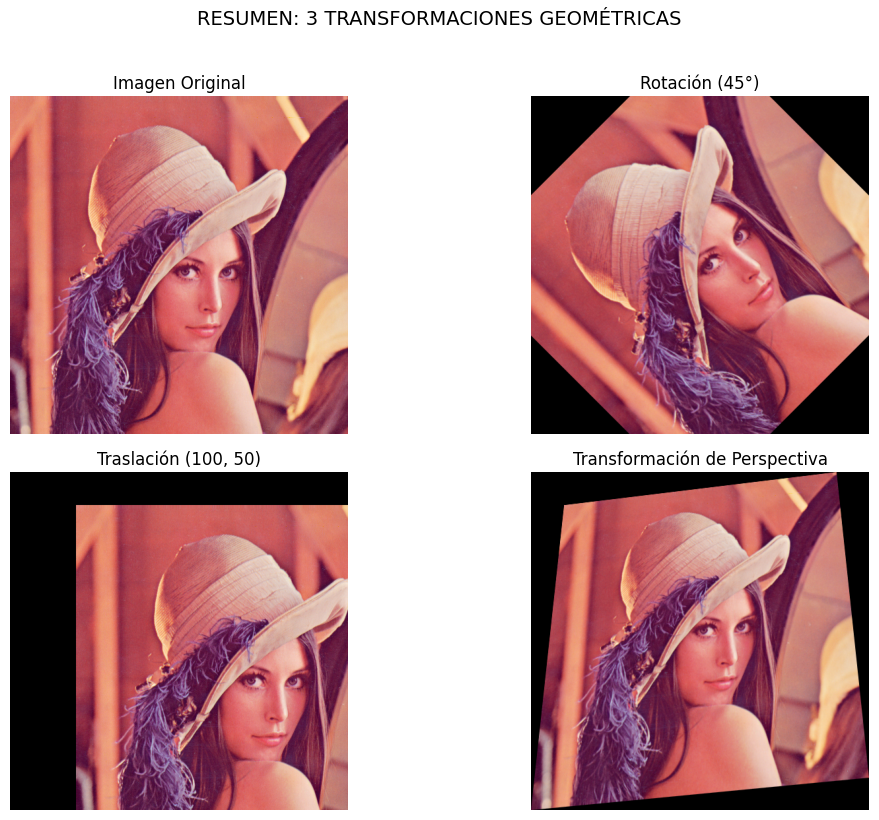

📋 COMPARACIÓN RÁPIDA
                | ROTACIÓN             | TRASLACIÓN           | PERSPECTIVA              
Qué hace        | Gira la imagen       | Mueve la imagen      | Cambia el punto de vista 
Matriz          | 2×3                  | 2×3                  | 3×3                      
Función OpenCV  | getRotationMatrix2D() | warpAffine()         | getPerspectiveTransform()
Ejemplo         | Corregir foto inclinada | Crear panorama       | Escanear documento       
🎛️ AJUSTA LOS PARÁMETROS:


interactive(children=(IntSlider(value=45, description='angulo', max=180, step=15), IntSlider(value=80, descrip…

✅ RESUMEN FINAL - TRANSFORMACIONES GEOMÉTRICAS

1. 🔄 ROTACIÓN
   • Usamos: cv2.getRotationMatrix2D()
   • Para: Corregir orientación de imágenes
   • Ejemplo: rotate_image(img, 90)

2. ➡️ TRASLACIÓN
   • Matriz: [[1,0,tx], [0,1,ty]]
   • Para: Mover imágenes dentro del marco
   • Ejemplo: translate_image(img, 50, 30)

3. 🎯 PERSPECTIVA
   • Usamos: cv2.getPerspectiveTransform()
   • Para: Cambiar punto de vista
   • Ejemplo: apply_perspective_transform(img, puntos)

💡 Todas usan:
   • warpAffine() para rotación/traslación
   • warpPerspective() para perspectiva
   • Importante: Las matrices son diferentes


In [13]:
# %% [markdown]
# ## 📊 7. Resumen y Comparación
#
# Veamos un resumen visual de las 3 transformaciones que aprendimos:

# %%
%matplotlib inline

# Crear figura simple
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# 1. Original
axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Imagen Original')
axes[0, 0].axis('off')

# 2. Rotación
rotada = rotate_image(image_rgb, 45)
axes[0, 1].imshow(rotada)
axes[0, 1].set_title('Rotación (45°)')
axes[0, 1].axis('off')

# 3. Traslación
trasladada = translate_image(image_rgb, 100, 50)
axes[1, 0].imshow(trasladada)
axes[1, 0].set_title('Traslación (100, 50)')
axes[1, 0].axis('off')

# 4. Perspectiva
h, w = image_rgb.shape[:2]
puntos_perspectiva = [[50, 50], [w-50, 0], [w-1, h-50], [0, h-1]]
perspectiva, _ = apply_perspective_transform(image_rgb, puntos_perspectiva)
axes[1, 1].imshow(perspectiva)
axes[1, 1].set_title('Transformación de Perspectiva')
axes[1, 1].axis('off')

plt.suptitle('RESUMEN: 3 TRANSFORMACIONES GEOMÉTRICAS', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# %% [markdown]
# ### 📝 Comparación rápida

# %%
print("📋 COMPARACIÓN RÁPIDA")
print("="*40)

comparacion = [
    ["", "ROTACIÓN", "TRASLACIÓN", "PERSPECTIVA"],
    ["Qué hace", "Gira la imagen", "Mueve la imagen", "Cambia el punto de vista"],
    ["Matriz", "2×3", "2×3", "3×3"],
    ["Función OpenCV", "getRotationMatrix2D()", "warpAffine()", "getPerspectiveTransform()"],
    ["Ejemplo", "Corregir foto inclinada", "Crear panorama", "Escanear documento"]
]

for fila in comparacion:
    print(f"{fila[0]:15} | {fila[1]:20} | {fila[2]:20} | {fila[3]:25}")

# %% [markdown]
# ### 🎮 Prueba rápida las 3

# %%
# Función simple para ver todas juntas
def ver_transformaciones(angulo=45, tx=80, ty=40):
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))

    # Original
    axes[0, 0].imshow(image_rgb)
    axes[0, 0].set_title('Original')
    axes[0, 0].axis('off')

    # Rotación
    rot = rotate_image(image_rgb, angulo)
    axes[0, 1].imshow(rot)
    axes[0, 1].set_title(f'Rotación\n{angulo}°')
    axes[0, 1].axis('off')

    # Traslación
    trans = translate_image(image_rgb, tx, ty)
    axes[1, 0].imshow(trans)
    axes[1, 0].set_title(f'Traslación\n({tx}, {ty})')
    axes[1, 0].axis('off')

    # Perspectiva simple
    h, w = image_rgb.shape[:2]
    offset = min(tx, ty) + 20
    puntos = [[offset, offset], [w-offset, 0], [w, h-offset], [0, h]]
    persp, _ = apply_perspective_transform(image_rgb, puntos)
    axes[1, 1].imshow(persp)
    axes[1, 1].set_title('Perspectiva\n(4 puntos)')
    axes[1, 1].axis('off')

    plt.tight_layout()
    plt.show()

    print(f"⚙️ Parámetros usados:")
    print(f"  • Rotación: {angulo}°")
    print(f"  • Traslación: X={tx}, Y={ty}")
    print(f"  • Perspectiva: offset={offset}")

print("🎛️ AJUSTA LOS PARÁMETROS:")
interact(ver_transformaciones,
         angulo=(0, 180, 15),
         tx=(-100, 100, 10),
         ty=(-100, 100, 10))

# %% [markdown]
# ### ✅ Lo que aprendimos hoy

# %%
print("✅ RESUMEN FINAL - TRANSFORMACIONES GEOMÉTRICAS")
print("="*50)

print("\n1. 🔄 ROTACIÓN")
print("   • Usamos: cv2.getRotationMatrix2D()")
print("   • Para: Corregir orientación de imágenes")
print("   • Ejemplo: rotate_image(img, 90)")

print("\n2. ➡️ TRASLACIÓN")
print("   • Matriz: [[1,0,tx], [0,1,ty]]")
print("   • Para: Mover imágenes dentro del marco")
print("   • Ejemplo: translate_image(img, 50, 30)")

print("\n3. 🎯 PERSPECTIVA")
print("   • Usamos: cv2.getPerspectiveTransform()")
print("   • Para: Cambiar punto de vista")
print("   • Ejemplo: apply_perspective_transform(img, puntos)")

print("\n" + "="*50)
print("💡 Todas usan:")
print("   • warpAffine() para rotación/traslación")
print("   • warpPerspective() para perspectiva")
print("   • Importante: Las matrices son diferentes")

✅ RESUMEN DEL VIDEO:
1. ROTACIÓN: cv2.getRotationMatrix2D()
2. TRASLACIÓN: matriz [[1,0,tx],[0,1,ty]]
3. PERSPECTIVA: cv2.getPerspectiveTransform()

🔧 Usos prácticos:
• Corregir fotos torcidas
• Escanear documentos
• Juegos y realidad aumentada
🎯 TU DESAFÍO:
Combina las 3 transformaciones en una


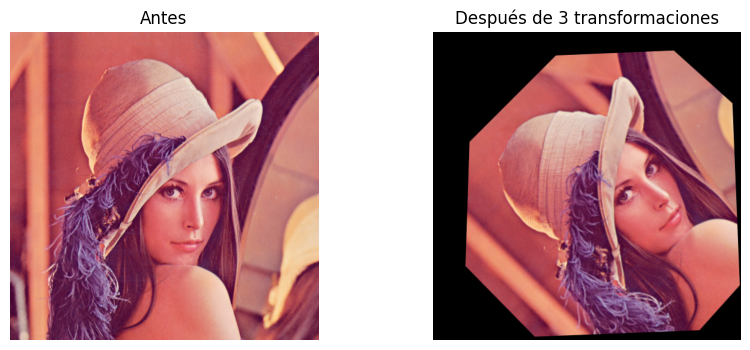

💡 Modifica el código arriba para crear tu propio efecto

🎉 ¡Gracias por ver el video!
Suscríbete para más contenido de visión artificial


In [14]:
# %% [markdown]
# ## 🎓 8. Conclusión

# %%
print("✅ RESUMEN DEL VIDEO:")
print("1. ROTACIÓN: cv2.getRotationMatrix2D()")
print("2. TRASLACIÓN: matriz [[1,0,tx],[0,1,ty]]")
print("3. PERSPECTIVA: cv2.getPerspectiveTransform()")
print("\n🔧 Usos prácticos:")
print("• Corregir fotos torcidas")
print("• Escanear documentos")
print("• Juegos y realidad aumentada")

# %% [markdown]
# ## 🚀 9. Tu Turno

# %%
print("🎯 TU DESAFÍO:")
print("Combina las 3 transformaciones en una")

# Mostrar ejemplo simple
resultado = image_rgb.copy()
resultado = rotate_image(resultado, 45)
resultado = translate_image(resultado, 50, 30)
h, w = resultado.shape[:2]
puntos = [[20,20], [w-20,0], [w, h-20], [0, h]]
resultado, _ = apply_perspective_transform(resultado, puntos)

# Mostrar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.imshow(image_rgb)
ax1.set_title('Antes')
ax1.axis('off')
ax2.imshow(resultado)
ax2.set_title('Después de 3 transformaciones')
ax2.axis('off')
plt.show()

print("💡 Modifica el código arriba para crear tu propio efecto")
print("\n🎉 ¡Gracias por ver el video!")
print("Suscríbete para más contenido de visión artificial")